In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
oin = pd.read_excel('./data/Online Retail.xlsx')
oin.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
oin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
oin.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
oin.describe(include=np.object)

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [7]:
print("총 데이터 수: ", oin.shape[0]*oin.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(oin.isnull().sum().sum(), (oin.isnull().sum().sum()*100)/(oin.shape[0] * oin.shape[1])))
print("전체 국가 수: ", oin.Country.nunique())
print("전체 판매 물건 수: ", oin.Description.nunique())

총 데이터 수:  4335272
총 결측치 수: 136534 = 전체 데이터의 3.15% 
전체 국가 수:  38
전체 판매 물건 수:  4223


In [8]:
""" 어떤 고객이 가장 지출을 많이 했을까?
상품 금액의 분포는?
어떤 물건의 주문량이 많을까?
날짜에 따라 판매 금액을 확인
요일에 따라서 주문량이 다를까
국가 별 평균 구매 금액
쇼핑몰 판매 물품의 주요 키워드 """

' 어떤 고객이 가장 지출을 많이 했을까?\n상품 금액의 분포는?\n어떤 물건의 주문량이 많을까?\n날짜에 따라 판매 금액을 확인\n요일에 따라서 주문량이 다를까\n국가 별 평균 구매 금액\n쇼핑몰 판매 물품의 주요 키워드 '

In [9]:
oin.columns = oin.columns.str.lower()
oin.columns
# 컬럼명 앞이 대문자라서 일할 때 불편함.

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [10]:
oin.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [11]:
oin[oin.isnull().any(axis=1)].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [12]:
oin1 = oin.dropna()
oin1.isnull().any()

invoiceno      False
stockcode      False
description    False
quantity       False
invoicedate    False
unitprice      False
customerid     False
country        False
dtype: bool

In [13]:
oin1['customerid'] = oin1['customerid'].astype('int64')
oin1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
invoiceno      406829 non-null object
stockcode      406829 non-null object
description    406829 non-null object
quantity       406829 non-null int64
invoicedate    406829 non-null datetime64[ns]
unitprice      406829 non-null float64
customerid     406829 non-null int64
country        406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
print(min(oin1['quantity']), max(oin1['quantity']))
print(min(oin1['unitprice']), max(oin1['unitprice']))

-80995 80995
0.0 38970.0


In [15]:
oin1 = oin1[oin1.quantity > 0]

In [16]:
oin1['spent'] = oin1['quantity'] * oin1['unitprice']

In [17]:
oin1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [18]:
oin1['year'] = oin1['invoicedate'].dt.year
oin1['month'] = oin1['invoicedate'].dt.month
oin1['day'] = oin1['invoicedate'].dt.day
oin1['weekday'] = oin1['invoicedate'].dt.weekday
oin1['hour'] = oin1['invoicedate'].dt.hour
oin1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


In [19]:
oin1.description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: description, dtype: int64

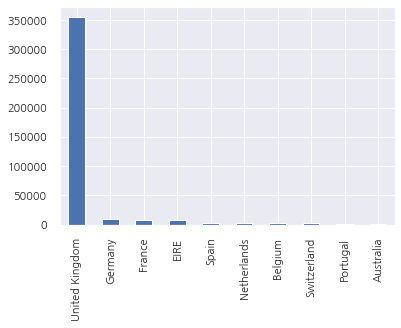

In [20]:
oin1.country.value_counts().head(10).plot.bar()

In [21]:
res1 = oin1[['customerid', 'spent']].groupby(['customerid']).sum()
res1.sort_values('spent', ascending=False)

res1 = res1[(res1['spent'] > 0)]

In [22]:
print("고객 번호 {}이 가장 소비를 많이 했다 {:.2f}".format(int(res1['spent'].argmax()), res1['spent'].max()))
print("고객 번호 {}이 가장 소비를 적게 했다 {:.2f}".format(int(res1['spent'].argmin()), res1['spent'].min()))

고객 번호 14646이 가장 소비를 많이 했다 280206.02
고객 번호 16738이 가장 소비를 적게 했다 3.75


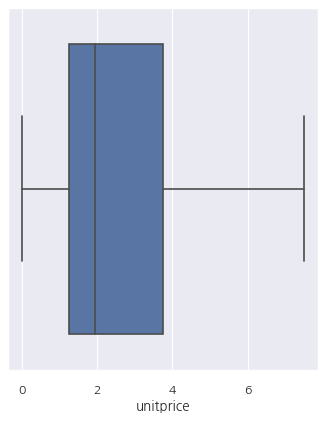

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6), dpi = 80)

sns.boxplot(oin1['unitprice'], showfliers = False, ax=ax)

plt.show()

In [24]:
chk1 = oin1[oin1['unitprice'] <= 5].shape[0]/oin1['unitprice'].shape[0]*100
print("5 파운드 이하의 상품 주문은 {:.2f} %".format(chk1))

5 파운드 이하의 상품 주문은 87.14 %


In [25]:
chk2 = np.sum(oin1[oin1['unitprice'] <= 5].spent) / np.sum(oin1.spent) * 100
print("수익의 {:.2f}%는 5 파운드 이하의 상품에서 발생".format(chk2))

수익의 79.68%는 5 파운드 이하의 상품에서 발생


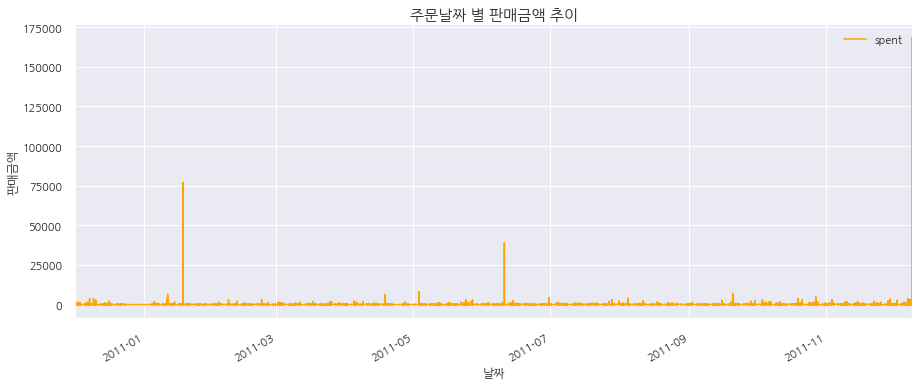

In [26]:
oin1.plot(x='invoicedate', y='spent', color='orange', figsize=(15, 6))

plt.title("주문날짜 별 판매금액 추이", fontsize=15)
plt.xlabel('날짜')
plt.ylabel('판매금액')

plt.show()
# 실제 판매자라면, 판매금액이 높은 날 어떤 일이 있었는지 알 수 있음

In [27]:
res2 = oin1.drop_duplicates(['invoiceno'], keep='first')

In [28]:
res2.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,8


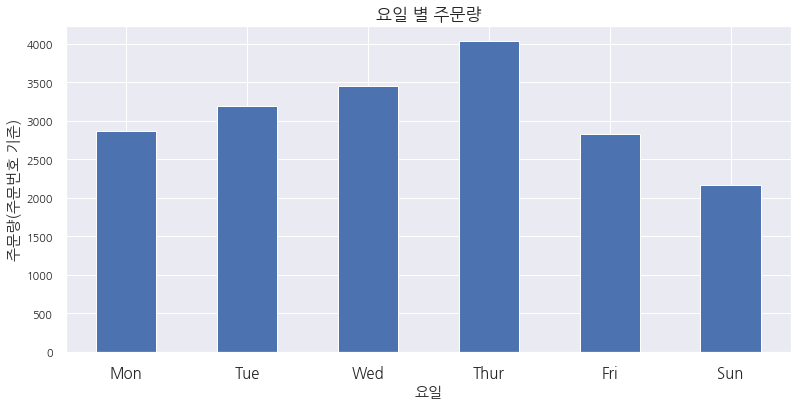

In [29]:
g1 = res2[['weekday', 'invoicedate']].groupby('weekday').count().plot(kind='bar', figsize=(13, 6))

g1.set_xlabel('요일', fontsize=15)
g1.set_ylabel('주문량(주문번호 기준)', fontsize=15)
g1.set_title('요일 별 주문량', fontsize=17)
g1.set_xticklabels(('Mon', 'Tue','Wed', 'Thur', 'Fri', 'Sun'), rotation='horizontal', fontsize=15)
g1.legend('')

plt.show()

In [30]:
res3 = res2[['hour', 'invoicedate']].groupby('hour').count()

In [31]:
res3

,invoicedate
hour,
6,1
7,29
8,555
9,1394
10,2226
11,2277
12,3129
13,2637
14,2275


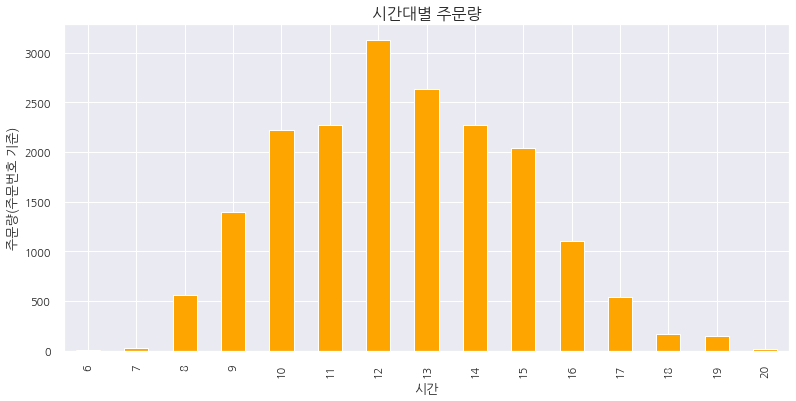

In [32]:
g2 = res3.plot(kind='bar', color='orange', figsize=(13, 6))

g2.set_xlabel('시간', fontsize=13)
g2.set_ylabel('주문량(주문번호 기준)', fontsize=13)
g2.set_title('시간대별 주문량', fontsize=16)
g2.legend('')

plt.show()

In [33]:
res4 = oin1[['quantity', 'spent', 'country', 'invoiceno']]
res4

,quantity,spent,country,invoiceno
0,6,15.30,United Kingdom,536365
1,6,20.34,United Kingdom,536365
2,8,22.00,United Kingdom,536365
3,6,20.34,United Kingdom,536365
4,6,20.34,United Kingdom,536365
...,...,...,...,...
541904,12,10.20,France,581587
541905,6,12.60,France,581587
541906,4,16.60,France,581587
541907,4,16.60,France,581587


In [34]:
aa = res4.groupby(['country', 'invoiceno']).sum()
aa['count'] = 1
aa

quantity    spent  count
country     invoiceno                          
Australia   536389          107   358.25      1
            537676          214   258.90      1
            539419          146   415.70      1
            540267         4662  7011.38      1
            540280          140   143.00      1
...                         ...      ...    ...
Unspecified 559929          271   252.05      1
            561658          205   347.35      1
            561661          114   199.08      1
            563947          126   252.90      1
            564051           59   278.13      1

[18536 rows x 3 columns]

In [35]:
bb = aa.groupby('country').sum()
bb

,quantity,spent,count
country,,,
Australia,84209,138521.310,57
Austria,4881,10198.680,17
Bahrain,260,548.400,2
Belgium,23237,41196.340,98
Brazil,356,1143.600,1
Canada,2763,3666.380,6
Channel Islands,9491,20450.440,26
Cyprus,6361,13590.380,16
Czech Republic,671,826.740,2


In [36]:
bb['avg_spent'] = bb['spent'] / bb['count']
bb.sort_values(['count', 'avg_spent'], ascending=False, inplace=True)
bb

,quantity,spent,count,avg_spent
country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816
Netherlands,200937,285446.340,95,3004.698316
Spain,27951,61577.110,90,684.190111
Australia,84209,138521.310,57,2430.198421
Portugal,16122,33439.890,57,586.664737


Text(0.5, 0, '금액')

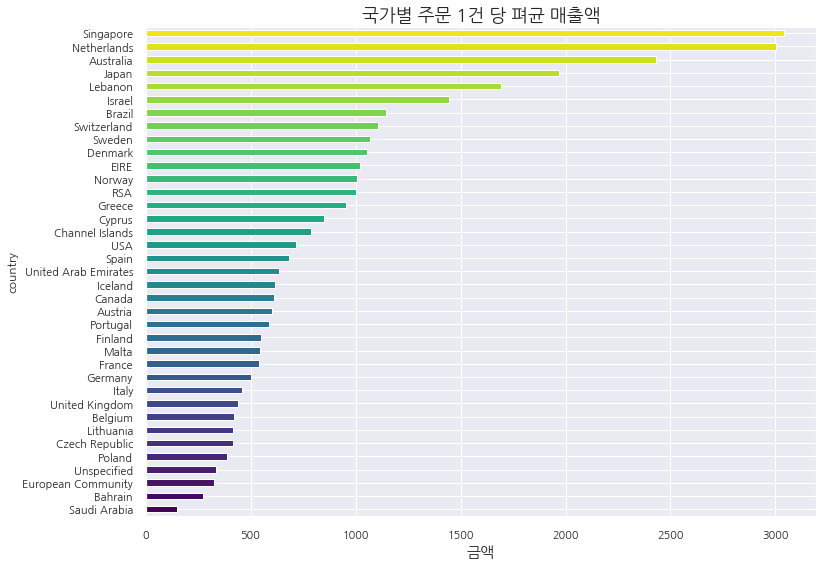

In [37]:
color = plt.cm.viridis(np.linspace(0, 1, 38))

bb['avg_spent'].sort_values().plot(kind='barh', figsize=(12,9), color=color)
plt.title('국가별 주문 1건 당 펴균 매출액', size=18)
plt.xlabel('금액', size=15)

In [40]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [39]:
!pip install wordcloud

In [41]:
stopwords = set(STOPWORDS)
print(stopwords)

{"couldn't", 'being', "you'd", 'k', 'here', "don't", 'has', 'when', "he'd", 'otherwise', 'any', 'ever', "she'd", 'what', 'www', 'with', 'through', 'too', 'have', 'how', 'not', 'below', "who's", "when's", 'which', 'also', 'since', 'himself', 'could', 'against', 'he', "we've", 'if', 'more', 'we', 'his', "wouldn't", "he's", 'from', 'very', 'whom', 'myself', 'hence', 'ought', 'herself', 'were', 'above', 'their', 'should', 'these', 'each', 'am', 'while', 'both', 'me', "didn't", 'are', 'no', 'but', 'our', 'those', 'yours', 'ourselves', "mustn't", 'because', "i'll", 'however', "i'd", 'in', 'own', 'again', 'itself', 'this', 'com', 'theirs', "here's", "i've", 'down', 'get', "we're", 'yourself', "wasn't", 'my', "we'll", 'your', "you've", 'http', 'just', 'off', 'same', "what's", "you'll", 'some', 'out', "we'd", 'than', 'him', 'they', 'only', 'hers', 'shall', "i'm", 'up', "they're", 'who', 'during', 'else', 'them', 'where', 'cannot', "he'll", 'further', 'over', "they'll", 'its', 'under', 'as', 'wh

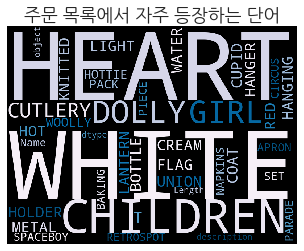

In [43]:
# stopwords.add()
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=800, height=600, colormap = 'PuBu').generate(str(oin1['description']))

plt.axis('off')
plt.title("주문 목록에서 자주 등장하는 단어", fontsize=18)
plt.imshow(wordcloud)
